## Covid cases in the UK

This notebook analyses the COVID data in the UK. 

**The data of this notebook was collected on the 16 September 2020.** The previous notebooks (Analysis of Covid Cases UK_2,3) were collected on the 18 August 2020 and 10 September 2020. This one focuses on the display, but since the results are changing (notably the growth in different local authorities) this one was written separately. Some elements of the previous notebooks are just commented. Some of the observations were written for the previous notebooks.


The data itself has been compiled by the UK government and is available through the website https://coronavirus.data.gov.uk/

Notice that since these statistics change every day, the results will also change. **It actually changes to the level that some files are no longer available, thus this is a second notebook as the file for deaths is not available**. 

Check the other notebook (Analysis of Covid Cases UK_1) for the deaths.

First, let's import some necessary items

In [1]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from statsmodels import api as sm

Now, let's define the urls from where the data will be downloaded, as csv files, these can also be downloaded as JSON.

In [2]:
url_cases    = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv'
#url_deaths   = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-deaths_latest.csv'

With these urls it is now possible to download the data from the urls and convert them to pandas DataFrames

In [3]:
cases_raw    = requests.get(url_cases).content
cases_csv    = pd.read_csv(io.StringIO(cases_raw.decode('utf-8')))
#deaths_raw   = requests.get(url_deaths).content
#deaths_csv   = pd.read_csv(io.StringIO(deaths_raw.decode('utf-8')))

Before any analysis or display, we can look into the structure of the DataFrame:

In [4]:
#cases_csv.head()

The fields include the area name (e.g. Adur), a specific code, Area type (**ltla** = lower tier local authority, **utla** = upper tier local authority, **region**, e.g. East Midlands, **nation**), dates, Daily and cummulative cases. 

Notice that the dates are going **down**, that is the first cases will be at the bottom of the table, this is important when we will display the data as it will mean that the first to be displayed is the most recent.

In [5]:
#deaths_csv.head()

For deaths, the fileds are similar, notice the difference in names for dates (**Reporting date/Specimen date**). General statistics can be extracted directly with describe():

In [6]:
#cases_csv.describe()

In [7]:
#deaths_csv.describe()

To display the graphs (that are shown everywhere...) we need the *Daily lab-confirmed cases* from the cases and the *Daily change in deaths* from the deaths. Let's first take the cases. We can extract the specimen date to create a time axis and the cases to create the values per time.

In [8]:
time_axis = cases_csv.loc[cases_csv['Area type']=='nation',['Specimen date']]
vert_axis = cases_csv.loc[cases_csv['Area type']=='nation',['Daily lab-confirmed cases']]
time_values = time_axis['Specimen date'];
vert_values = vert_axis['Daily lab-confirmed cases']

Let's also calculate the seven day rolling average number

In [9]:
sevenDayAv  = np.convolve(vert_values,np.ones(7,)/7, mode='same')

We can now display the data:

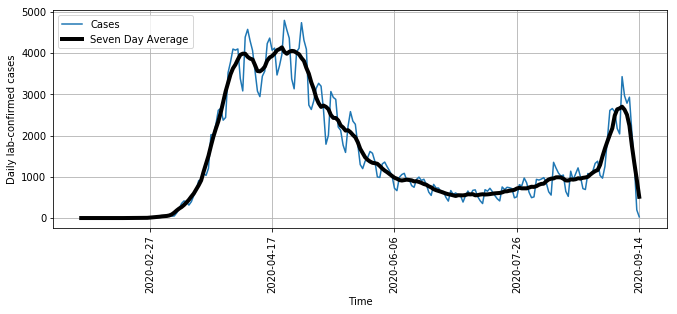

In [10]:
fig = plt.figure(figsize=(11, 4))
ax  = fig.add_subplot(111)
plt.plot(time_values,vert_values,label="Cases")
plt.plot(time_values,sevenDayAv,'k',label="Seven Day Average",linewidth=4)

plt.xlabel('Time')
plt.ylabel('Daily lab-confirmed cases')
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.invert_xaxis()
plt.legend(loc="upper left")
plt.grid()


The question (as of the 5th of August 2020) is if the cases are increasing, thus hinting a second wave coming. Let's zoom in to have a better look:

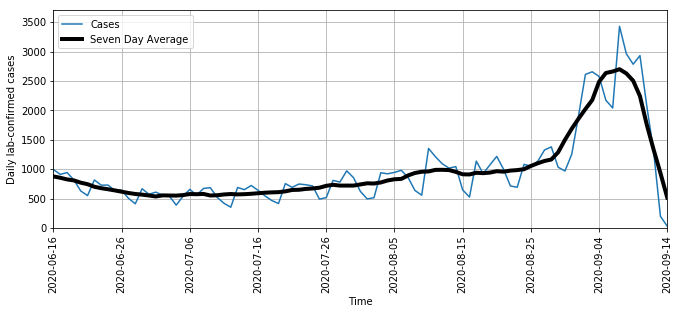

In [11]:
ax.set_xlim(0,90)
ax.set_ylim(0,3700)
ax.invert_xaxis()
fig

It does seem that the cases are going up. Let's look at deaths:

In [12]:
#time_axisD = deaths_csv.loc[deaths_csv['Area type']=='UK',['Reporting date']]
#vert_axisD = deaths_csv.loc[deaths_csv['Area type']=='UK',['Daily change in deaths']]
#time_valuesD = time_axisD['Reporting date'];
#vert_valuesD = vert_axisD['Daily change in deaths']
#sevenDayAvD  = np.convolve(vert_valuesD,np.ones(7,)/7, mode='same')

In [13]:
#len(time_valuesD)

In [14]:
#fig2 = plt.figure(figsize=(11, 4))
#ax2  = fig2.add_subplot(111)
#plt.plot(time_valuesD,vert_valuesD,label="Deaths")
#plt.plot(time_valuesD,sevenDayAvD,'k',label="Seven Day Average",linewidth=4)

#plt.xlabel('Time')
#plt.ylabel('Daily change in deaths')
#ax2.tick_params(axis='x', rotation=90)
#ax2.xaxis.set_major_locator(ticker.AutoLocator())
#ax2.invert_xaxis()
#plt.legend(loc="upper left")
#plt.grid()


In this case, it does not seem that the deaths are rising, this may be due to several factors, better knowledge of the disease and treatment, or simply that the new cases will develop and then in 2-3 weeks time the deaths will start rising.

Now, let's look at some regions. For the sake of analysis I have selected nine different regions:

In [15]:
testRegions=['Adur','Barrow-in-Furness','Carlisle','Guildford','Mid Sussex',
     'North Devon','New Forest','Stafford','Worthing']

Now I am going to display each of them in a separate subplot. So that they are easy to compare visually, let's set all to have the same vertical axis.

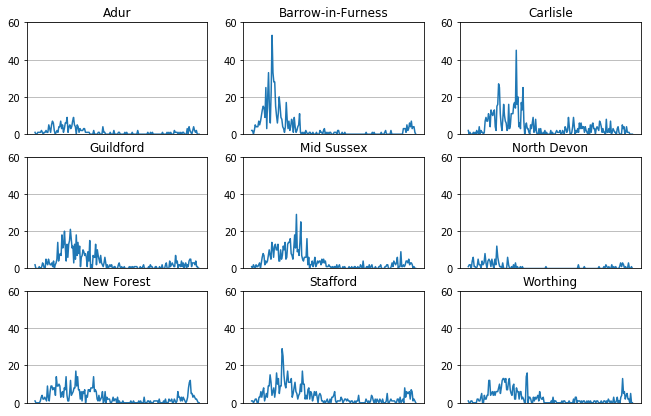

In [16]:
fig3 = plt.figure(figsize=(11, 7))

for counter in range(len(testRegions)):
    ax331  = fig3.add_subplot(3,3,counter+1)
    plt.plot(cases_csv.loc[cases_csv['Area name']==testRegions[counter],['Daily lab-confirmed cases']]) 
    plt.grid()
    ax331.invert_xaxis()
    ax331.set_ylim(0,60)
    ax331.set_title(testRegions[counter])
    ax331.set_xticks([])

Some names (e.g. Coventry) appear both in the upper tier and lower tier local authority, thus if we do not distinguish between these and try to display, it does not work:

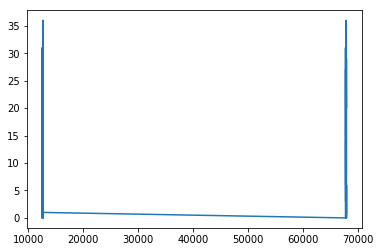

In [17]:
plt.plot(cases_csv.loc[cases_csv['Area name']=='Coventry',['Daily lab-confirmed cases']]) 

What we see is that there are cases of Coventry around the rows 10,000 and 50,000 of the csv file and the rest is empty. Thus we need to select over two columns to make the correct selection. E.g. for lower tier:

In [18]:
#(cases_csv['Area type']=='ltla')&(cases_csv['Area name']=='Coventry')

And the actual values are extracted like this:

In [19]:
#cases_csv.loc[(cases_csv['Area type']=='ltla')&(cases_csv['Area name']=='Coventry'),['Daily lab-confirmed cases']]

In [20]:
#cases_csv.loc[(cases_csv['Area type']=='utla')&(cases_csv['Area name']=='Coventry'),['Daily lab-confirmed cases']]

We can now display, and let's compare two different local authorities, Coventry and Leicester

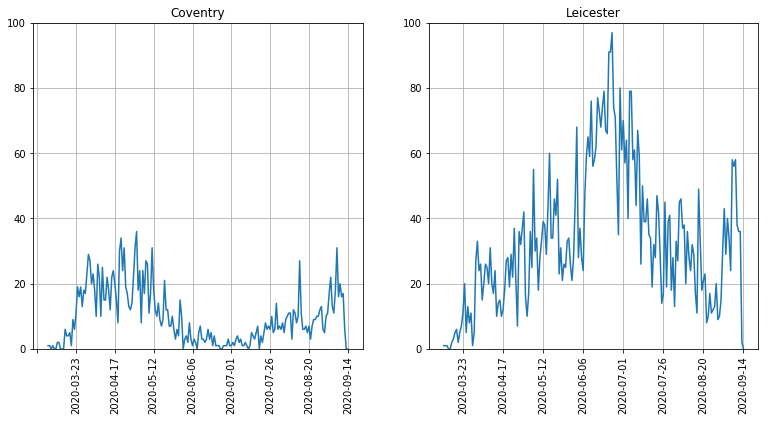

In [21]:
fig4 = plt.figure(figsize=(13, 6))

index_ltla_Coventry  = (cases_csv['Area type']=='ltla')&(cases_csv['Area name']=='Coventry')
index_ltla_Leicester = (cases_csv['Area type']=='ltla')&(cases_csv['Area name']=='Leicester')
time_Coventry        = cases_csv.loc[index_ltla_Coventry,['Specimen date']]
time_Leicester       = cases_csv.loc[index_ltla_Leicester,['Specimen date']]#time_values = time_axis['Specimen date'];
cases_Coventry       = cases_csv.loc[index_ltla_Coventry,['Daily lab-confirmed cases']]
cases_Leicester       = cases_csv.loc[index_ltla_Leicester,['Daily lab-confirmed cases']]

ax211  = fig4.add_subplot(1,2,1)
plt.plot(time_Coventry['Specimen date'], cases_Coventry) 
plt.grid()
ax211.invert_xaxis()
ax211.set_ylim(0,100)
ax211.set_title('Coventry')
ax211.tick_params(axis='x', rotation=90)
ax211.xaxis.set_major_locator(ticker.AutoLocator())


ax212  = fig4.add_subplot(1,2,2)
plt.plot(time_Leicester['Specimen date'],cases_Leicester) 
plt.grid()
ax212.invert_xaxis()
ax212.set_ylim(0,100)
ax212.set_title('Leicester')
ax212.tick_params(axis='x', rotation=90)
ax212.xaxis.set_major_locator(ticker.AutoLocator())


The growth of Leicester is significant as compared with Coventry, and that would explain the reasons to impose a specific lockdown in Leicester, which seems to have worked as the numbers have decreased, whilst Coventry seems to be starting to go up.

Thus, it would be interesting to observe in which local authorities the numbers are going up and in which they are going down. 

So, let's first identify the local authorities. The lower tier can be obtained like this:

In [22]:
LocalAuthorities=pd.Series.unique(cases_csv.loc[cases_csv['Area type']=='ltla', 'Area name'])
len(LocalAuthorities)

315

Mmmh, 315 are a big number, let's take the upper tier:


In [23]:
LocalAuthorities=pd.Series.unique(cases_csv.loc[cases_csv['Area type']=='utla', 'Area name'])
numLocalAuthorities = len(LocalAuthorities)
numLocalAuthorities

149

This number is more manageable, let's list them:

In [24]:
LocalAuthorities

array(['Barking and Dagenham', 'Barnet', 'Barnsley',
       'Bath and North East Somerset', 'Bedford', 'Bexley', 'Birmingham',
       'Blackburn with Darwen', 'Blackpool', 'Bolton',
       'Bournemouth, Christchurch and Poole', 'Bracknell Forest',
       'Bradford', 'Brent', 'Brighton and Hove', 'Bristol, City of',
       'Bromley', 'Buckinghamshire', 'Bury', 'Calderdale',
       'Cambridgeshire', 'Camden', 'Central Bedfordshire',
       'Cheshire East', 'Cheshire West and Chester',
       'Cornwall and Isles of Scilly', 'County Durham', 'Coventry',
       'Croydon', 'Cumbria', 'Darlington', 'Derby', 'Derbyshire', 'Devon',
       'Doncaster', 'Dorset', 'Dudley', 'Ealing',
       'East Riding of Yorkshire', 'East Sussex', 'Enfield', 'Essex',
       'Gateshead', 'Gloucestershire', 'Greenwich',
       'Hackney and City of London', 'Halton', 'Hammersmith and Fulham',
       'Hampshire', 'Haringey', 'Harrow', 'Hartlepool', 'Havering',
       'Herefordshire, County of', 'Hertfordshire', 'Hil

We can select the numbers corresponding to each local authority and then extract a number of metrics, let's just take the following maximum cases and trend (i.e. going up or down).

The maximum can be easily obtained with np.max

In [25]:
np.max(cases_csv.loc[(cases_csv['Area type']=='utla')&(cases_csv['Area name']=='Leicester'),['Daily lab-confirmed cases']])

Daily lab-confirmed cases    97
dtype: int64

The trend requires a bit more work. All local authorities must have experienced an increase from when the cases started to be recorded, reached a peak and then decreased. What is more interesting is the later trends, like Leicester or Coventry. So, let's fit a line to the latter cases. We can do this with numpy least squares polynomial fit *np.polyfit*. The polyfit takes 3 arguments:
* the x values (a range of values of the same length as the y
* the y values, in this case the cases of the local authority
* the degree of the fitting polynomial

Let's calculate for both local authorities, for the whole series for the time being.

In [26]:
np.polyfit(np.arange(len(cases_Coventry)),cases_Coventry.values.flatten(),1)

array([0.03167319, 6.79920698])

In [27]:
np.polyfit(np.arange(len(cases_Leicester)),cases_Leicester.values.flatten(),1)

array([-0.10678933, 43.17629179])

Notice that we extracted the values from the dataframe and flattened them (cases_Coventry.values.flatten()). The first value is the slope and the second is the intercept.  

**REMEMBER** that the most recent date is on the top so a positive slope would actually reflect a reduction of cases (as for Coventry in the whole period) and a negative would be an increase (as for Leicester in the whole period).

Now to take the most recent days for analysis, which are the first values of the array. Let's take a month.


In [28]:
np.polyfit(np.arange(len(cases_Coventry[:30])),cases_Coventry[:30].values.flatten(),1)

array([-0.26140156, 14.55698925])

In [29]:
np.polyfit(np.arange(len(cases_Leicester[:30])),cases_Leicester[:30].values.flatten(),1)


array([-0.51724138, 33.        ])

The cases have inverted as Coventry is growing and Leicester is decreasing. We can now run for all the local authorities.

In [30]:
max_cases   = np.zeros(numLocalAuthorities)
slope_cases = np.zeros(numLocalAuthorities)
for i in np.arange(numLocalAuthorities):
    index_current   = (cases_csv['Area type']=='utla')&(cases_csv['Area name']==LocalAuthorities[i])
    cases_current   = cases_csv.loc[index_current,['Daily lab-confirmed cases']]
    max_cases [i]   = np.max(cases_current)
    temp            = np.polyfit(np.arange(len(cases_current[:30])),cases_current[:30].values.flatten(),1)
    slope_cases[i]  = -temp[0];

Now, we only need to sort the arrays for the maximum cases and the slopes, and we do not actually need the sorted values but the indexes so we use *np.argsort*.

In [31]:
indexMax   =(np.argsort(max_cases))
indexSlope =(np.argsort(slope_cases))

Let's check which cases have highest and lowest values:

In [32]:
LocalAuthorities[indexMax[:5]]

array(['Rutland', 'North East Lincolnshire',
       'Bath and North East Somerset', 'Bracknell Forest',
       'West Berkshire'], dtype=object)

In [33]:
LocalAuthorities[indexMax[-5:]]

array(['Essex', 'Hampshire', 'Lancashire', 'Kent', 'Birmingham'],
      dtype=object)

In [34]:
LocalAuthorities[indexSlope[:5]]

array(['Swindon', 'Northamptonshire', 'Hackney and City of London',
       'Bath and North East Somerset', 'Oxfordshire'], dtype=object)

In [35]:
LocalAuthorities[indexSlope[-5:]]

array(['Liverpool', 'Leeds', 'Lancashire', 'Bolton', 'Birmingham'],
      dtype=object)

Last month (check notebook Analysis of Covid Cases UK_2) the case of Kent was interesting, whilst it presented the highest number of cases of all local authorities, it is also the one that has decreased the most. Now the one with highest decrease is Northampton and the one with highest increase is Birmingham.

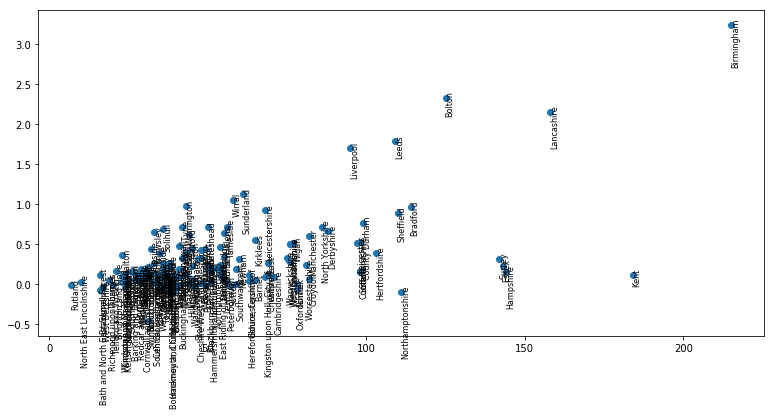

In [36]:
fig5 = plt.figure(figsize=(13, 6))
plt.plot(max_cases,slope_cases,'o')
for i in np.arange(numLocalAuthorities):
    plt.text(max_cases[i],slope_cases[i],LocalAuthorities[i],rotation=90,fontsize=8)

To finish, let's display the regions with highest and lowest increase of cases in the past month.

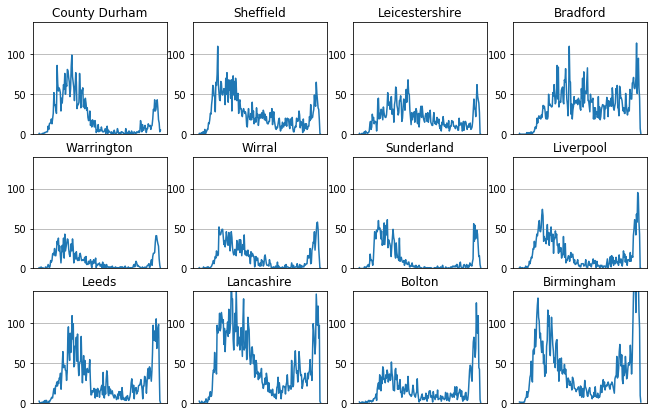

In [37]:
testRegions = LocalAuthorities[indexSlope[-12:]]
testRegions
fig6 = plt.figure(figsize=(11, 7))

for counter in range(len(testRegions)):
    ax331  = fig6.add_subplot(3,4,counter+1)
    plt.plot(cases_csv.loc[(cases_csv['Area type']=='utla')&(cases_csv['Area name']==testRegions[counter]),['Daily lab-confirmed cases']]) 
    plt.grid()
    ax331.invert_xaxis()
    ax331.set_ylim(0,140)
    ax331.set_title(testRegions[counter])
    ax331.set_xticks([])

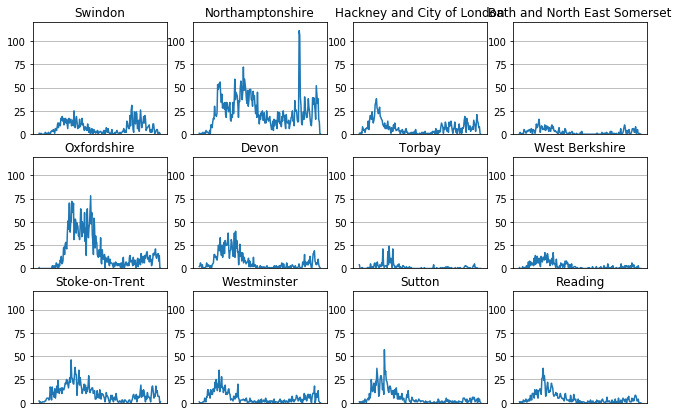

In [38]:
testRegions = LocalAuthorities[indexSlope[:12]]
testRegions
fig7 = plt.figure(figsize=(11, 7))

for counter in range(len(testRegions)):
    ax331  = fig7.add_subplot(3,4,counter+1)
    plt.plot(cases_csv.loc[(cases_csv['Area type']=='utla')&(cases_csv['Area name']==testRegions[counter]),['Daily lab-confirmed cases']]) 
    plt.grid()
    ax331.invert_xaxis()
    ax331.set_ylim(0,120)
    ax331.set_title(testRegions[counter])
    ax331.set_xticks([])

Whilst Leicester decreased gradually, Northamptonshire had a spike, but has remain relatively stable and even could be said that there has been an increase if the spike were to be removed.

In [39]:
url_Lat_Long    = 'https://opendata.arcgis.com/datasets/ae90afc385c04d869bc8cf8890bd1bcd_1.csv'
Lat_Long_raw    = requests.get(url_Lat_Long).content
Lat_Long_csv    = pd.read_csv(io.StringIO(Lat_Long_raw.decode('utf-8')))

In [40]:
LocalAuthoryCodes = pd.Series.unique(cases_csv.loc[cases_csv['Area type']=='utla', 'Area code'])
testRegions       = LocalAuthorities[indexSlope[-12:]]
testRegionsCodes  = LocalAuthoryCodes[indexSlope[-12:]]
testRegionsCodes

array(['E06000047', 'E08000019', 'E10000018', 'E08000032', 'E06000007',
       'E08000015', 'E08000024', 'E08000012', 'E08000035', 'E10000017',
       'E08000001', 'E08000025'], dtype=object)

In [66]:
testRegions_Lat_Long=np.zeros([len(testRegions),2])
for counter in range(len(testRegions)):    
    try:
        testRegions_Lat_Long[counter,0] = Lat_Long_csv.loc[Lat_Long_csv['lad17cd']==testRegionsCodes[counter],'long']
        testRegions_Lat_Long[counter,1] = Lat_Long_csv.loc[Lat_Long_csv['lad17cd']==testRegionsCodes[counter],'lat']
    except:
        testRegions_Lat_Long[counter,0] = -1
        testRegions_Lat_Long[counter,1] = 51                

In [67]:
testRegions_Lat_Long


array([[-1.8405    , 54.68513107],
       [-1.54253995, 53.40357971],
       [-1.        , 51.        ],
       [-1.87389004, 53.84381866],
       [-2.56167006, 53.39162827],
       [-3.06502008, 53.37453842],
       [-1.43343997, 54.85720062],
       [-2.91364002, 53.40829849],
       [-1.50735998, 53.82273102],
       [-1.        , 51.        ],
       [-2.47952008, 53.58449173],
       [-1.88141   , 52.48403931]])

In [88]:
numberAuthoritiesDisplay = 22
testRegions              = LocalAuthorities[indexSlope[-numberAuthoritiesDisplay:]]
testRegions_Lat_Long     = np.zeros([len(testRegions),2])
testRegionsCodes         = LocalAuthoryCodes[indexSlope[-numberAuthoritiesDisplay:]]
testRegions_Lat_Long

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

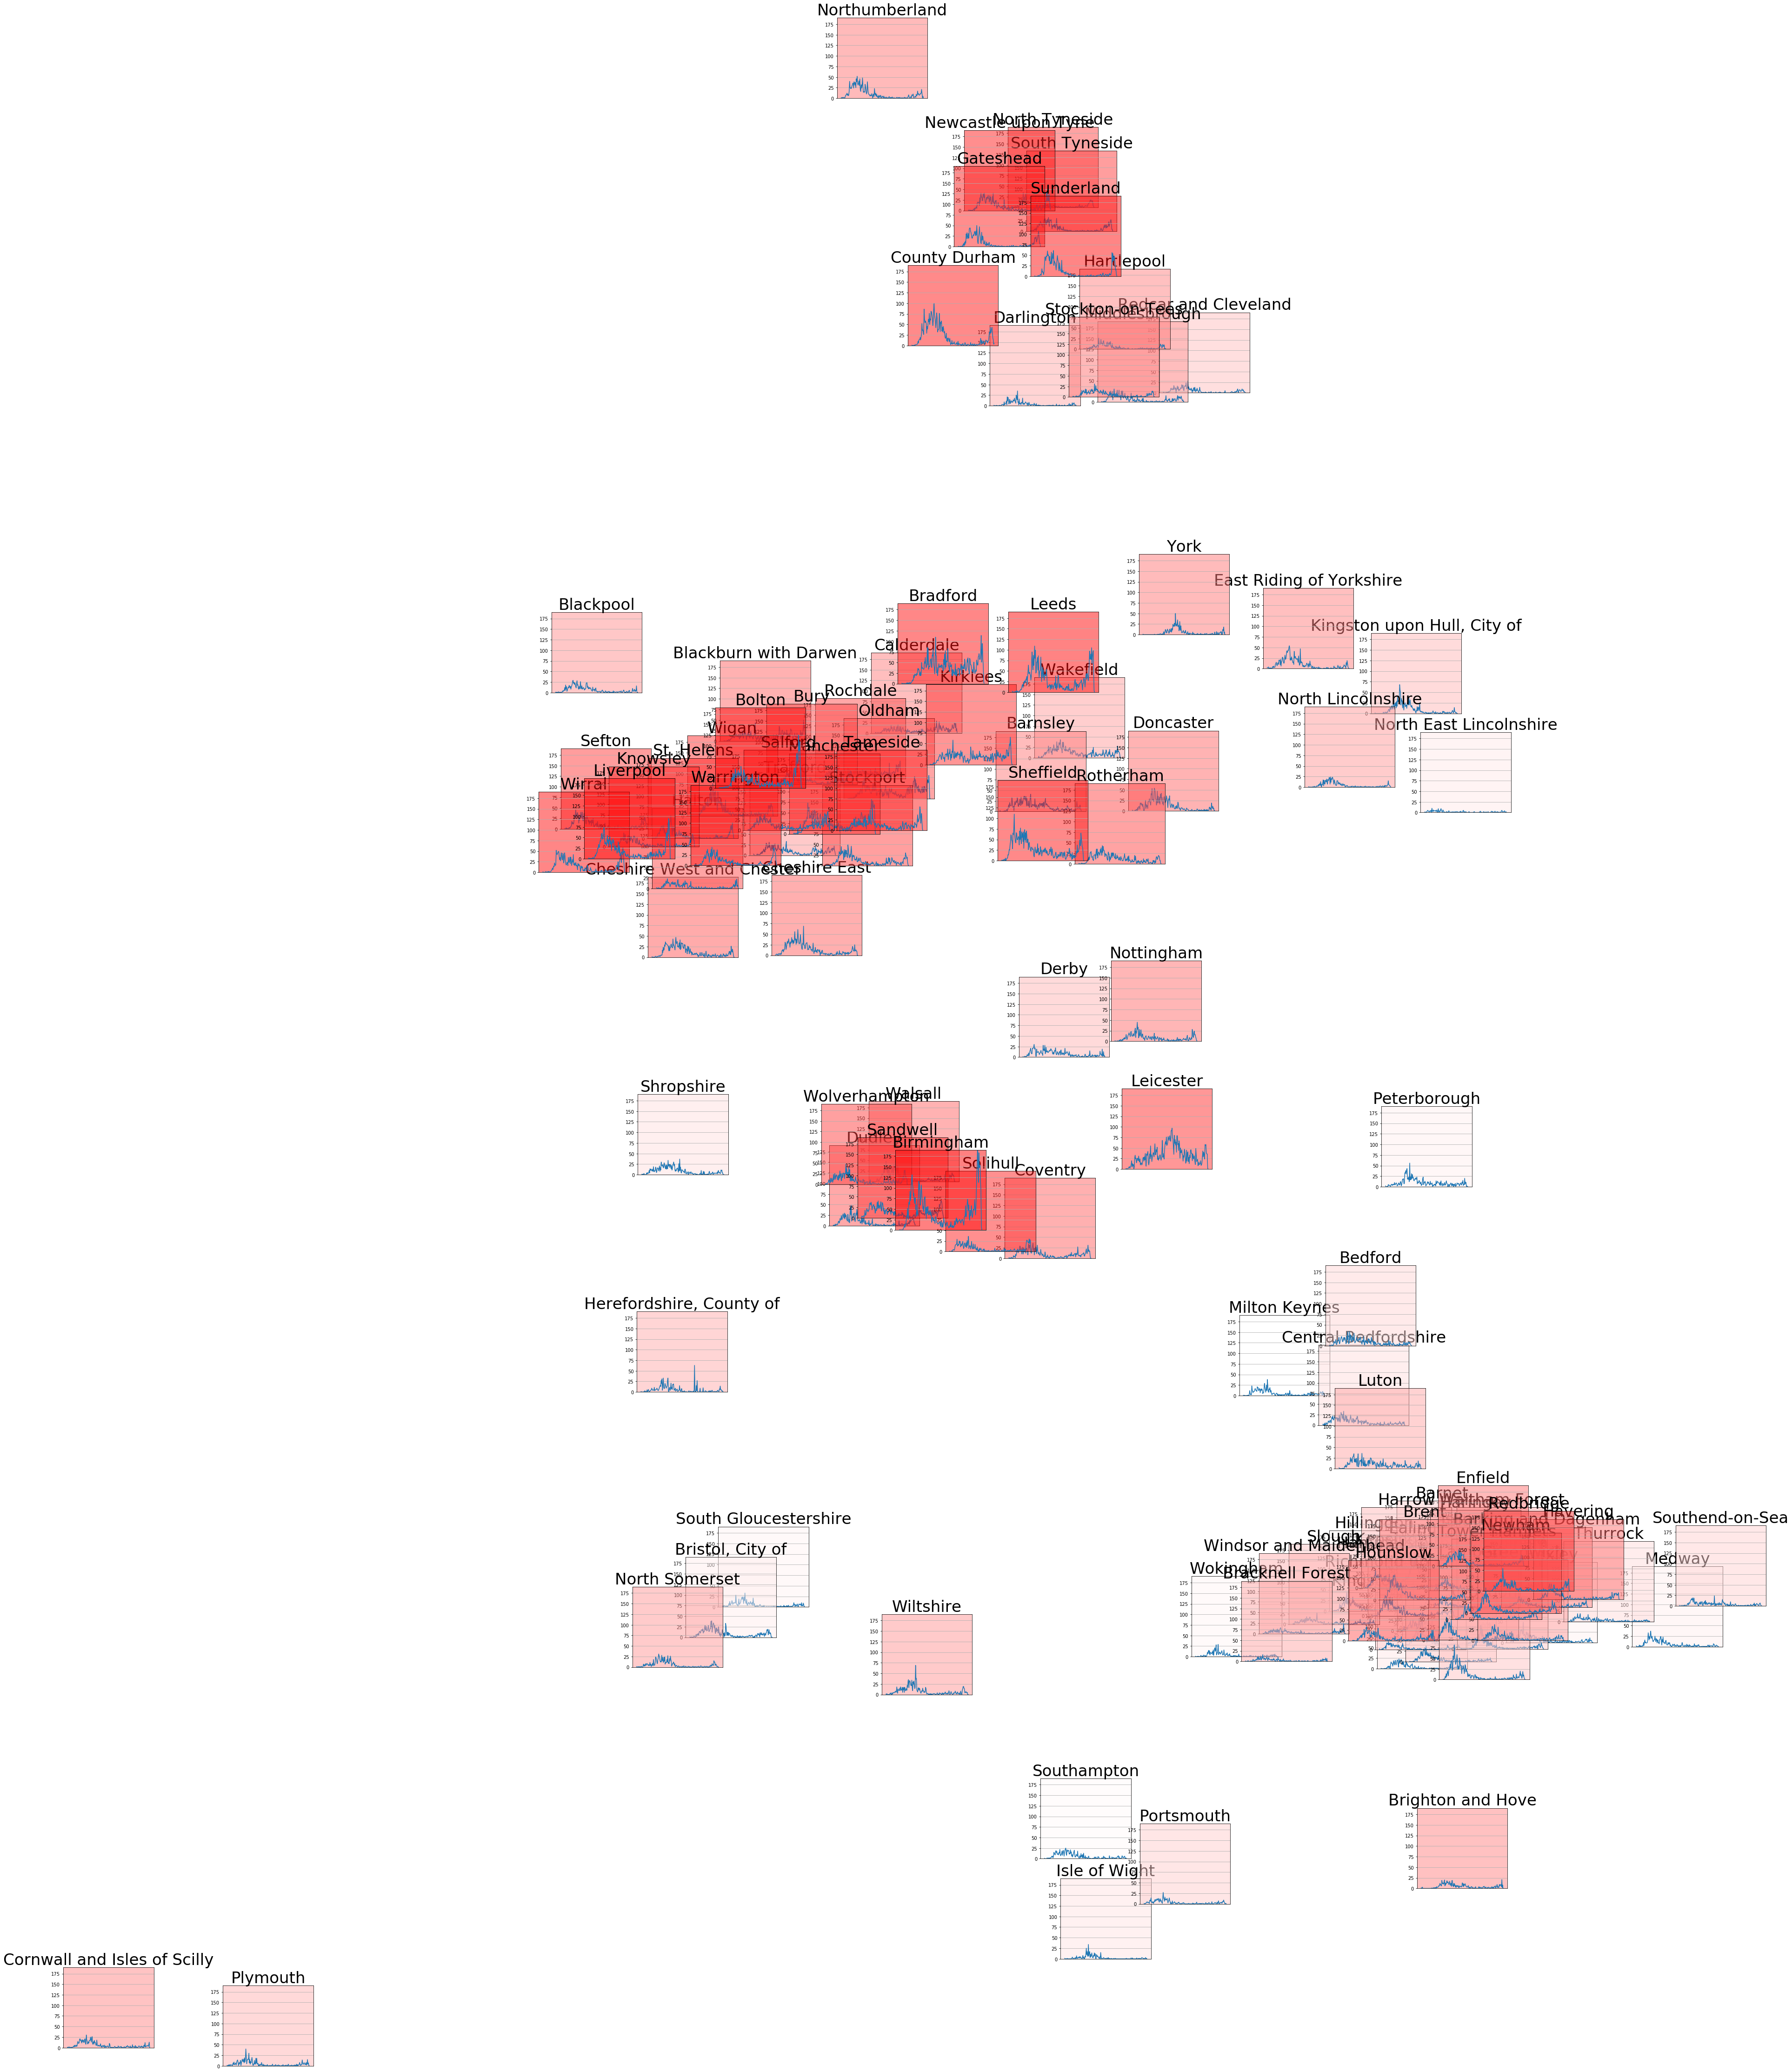

In [108]:
numberAuthoritiesDisplay = 132
testRegions              = LocalAuthorities[indexSlope[-numberAuthoritiesDisplay:]]
testRegions_Lat_Long     = np.zeros([len(testRegions),2])
testRegionsCodes         = LocalAuthoryCodes[indexSlope[-numberAuthoritiesDisplay:]]
for counter in range(len(testRegions)):    
    try:
        testRegions_Lat_Long[counter,0] = Lat_Long_csv.loc[Lat_Long_csv['lad17cd']==testRegionsCodes[counter],'long']
        testRegions_Lat_Long[counter,1] = Lat_Long_csv.loc[Lat_Long_csv['lad17cd']==testRegionsCodes[counter],'lat']
    except:
        testRegions_Lat_Long[counter,0] = -1
        testRegions_Lat_Long[counter,1] = -1       


fig8 = plt.figure(figsize=(9, 12))

for counter in range(len(testRegions)):
    if (testRegions_Lat_Long[counter,1])>0:
        ax331  = fig8.add_subplot(1,numberAuthoritiesDisplay,counter+1)
        plt.plot(cases_csv.loc[(cases_csv['Area type']=='utla')&(cases_csv['Area name']==testRegions[counter]),['Daily lab-confirmed cases']]) 
        plt.grid()
        ax331.invert_xaxis()
        ax331.set_ylim(0,190)
        ax331.set_title(testRegions[counter],fontsize=34)
        ax331.set_xticks([])
        ax331.set_facecolor([1,1-counter/numberAuthoritiesDisplay,1-counter/numberAuthoritiesDisplay,0.5])
        ax331.set_position([testRegions_Lat_Long[counter,0],testRegions_Lat_Long[counter,1],0.3,0.2])
    
    

In [93]:
counter

12